In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'ref_hash':np.int64, 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'device_os_version':np.float64, 'device_brand':np.float64, 'device_model':np.float64,\
              'device_city':np.float64, 'session_user_agent':np.float64, 'trans_id':'category', 'user_agent':np.float64, \
              'event_uuid':object, 'carrier':np.float64, 'kind':np.float64, 'device_os':'category', 'wifi':object, 'connection_type':'category',\
              'ip_address':np.int64, 'device_language':np.float64, 'connection_type':'category'}

events = pd.read_csv('data/train_events.csv.gzip', dtype=dtype_list, parse_dates= ['date'])

In [12]:
len(events)

2494423

In [27]:
events.head().T

,0,1,2,3,4
date,2019-03-05 00:09:36.966000,2019-03-05 00:09:38.920000,2019-03-05 00:09:26.195000,2019-03-05 00:09:31.107000,2019-03-09 21:00:36.585000
event_id,0,1,0,2,3
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,2688759737656491380,2688759737656491380,2688759737656491380,2688759737656491380,2635154697734164782
application_id,38,38,38,38,38
attributed,False,False,False,False,False
device_os_version,5.9087e+17,5.9087e+17,5.9087e+17,5.9087e+17,7.39184e+18
device_brand,NaN,NaN,NaN,NaN,NaN
device_model,5.99012e+18,5.99012e+18,5.99012e+18,5.99012e+18,5.9609e+18
device_city,3.25822e+18,3.25822e+18,3.25822e+18,2.55178e+18,6.95933e+18


In [14]:
events.dtypes

date                  datetime64[ns]
event_id                       int16
ref_type                    category
ref_hash                       int64
application_id                 int64
attributed                      bool
device_countrycode          category
device_os_version            float64
device_brand                 float64
device_model                 float64
device_city                  float64
session_user_agent           float64
trans_id                    category
user_agent                   float64
event_uuid                    object
carrier                      float64
kind                         float64
device_os                   category
wifi                          object
connection_type             category
ip_address                     int64
device_language              float64
dtype: object

In [15]:
events['wifi'].value_counts()

true     930902
false    447970
Name: wifi, dtype: int64

In [16]:
events['wifi'].isnull().sum()

1115551

In [17]:
events['wifi'] = (events['wifi'] == 'true')

In [18]:
events['wifi'].dtypes

dtype('bool')

In [19]:
events['device_countrycode'].value_counts()

6333597102633388268    2494423
Name: device_countrycode, dtype: int64

In [20]:
events['device_countrycode'].isnull().sum()

0

In [21]:
#es un único valor para todos los eventos entonces lo guardo en una variable y borro lo columna
device_countrycode = events['device_countrycode'].unique()[0]
device_countrycode

'6333597102633388268'

In [22]:
del events['device_countrycode']

In [23]:
events['event_uuid'].value_counts()

a8dbcce0-a8e0-4580-b273-d1e0b2433c9a    1
ca9c9b29-7c5c-4044-b87d-8e664c82fd26    1
5a956baf-577a-4dd1-b849-289100f9355c    1
7824059c-2767-4c1a-86b6-5413ca3885fb    1
23d858e4-2a3a-40c5-add8-e55142d438b6    1
86990351-a8af-4041-a1c7-2be23efc3fc2    1
f15f4bca-ff48-4531-a7df-1daea7465d54    1
a59bfe5f-053c-4b49-9de6-19279643f505    1
2516c660-3702-4c7f-8715-180b176cbb9c    1
25fef89a-30b2-49d9-a30e-0e29853571dc    1
4d3a5f03-6e85-46f7-892e-39ebc8de2502    1
ae56d656-484b-42eb-8f66-47e6e4232121    1
4c681adb-64d5-4cd3-b965-7c06f9fbc399    1
7759a737-341a-434f-8b0e-f8375ad0c01b    1
a1610fe7-2eab-4ebb-97f2-bfb958b1bb3e    1
225a9943-1d08-4536-a324-79f0b6bfe8f3    1
4c3a65e7-2c82-4bb9-b526-fc778e4df177    1
be4dedd7-a8cd-4508-8169-9bf99c2f51dc    1
e636a379-8ee4-491b-844c-b45ddb922cb5    1
3308c8c4-0999-4742-95eb-a799715070bf    1
5c4156aa-6b9c-4e2d-8e34-e57f23a1989d    1
0fc4f54c-3330-4293-8806-e0ec0148f2ec    1
f34d7c6d-f3c5-4afc-8164-da1733686de3    1
29ab2d70-d1b1-4ad9-9e02-0d30e0f8e3

In [24]:
#son todos valores diferentes, no me dice nada, borro la columna
del events['event_uuid']

In [25]:
events['hour'] = events['date'].dt.hour

In [26]:
events['day'] = events['date'].dt.day

Text(0.5, 0, 'aplicaciones')

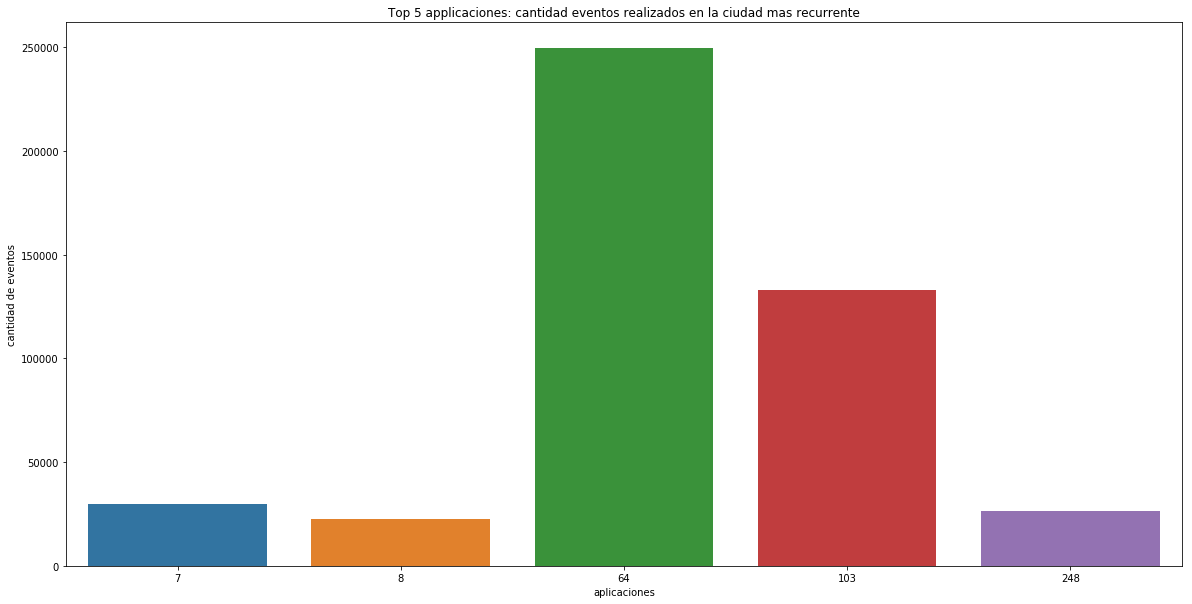

In [142]:
top_city = [x for x in events['device_city'].value_counts().head(1).keys()]

events_city_app = events.loc[events['device_city'].isin(top_city), ['application_id']].reset_index()
events_city_app.insert(loc = 1, column = 'cant', value = 1)
events_city_app = events_city_app.groupby(['application_id']).agg('sum').nlargest(5, 'cant').reset_index()

plt.figure(figsize=(20,10))
graph_city_app_events = sns.barplot (x=events_city_app['application_id'], y=events_city_app['cant'], data = events_city_app)
graph_city_app_events.set_title("Top 5 applicaciones: cantidad eventos realizados en la ciudad mas recurrente")
graph_city_app_events.set_ylabel("cantidad de eventos")
graph_city_app_events.set_xlabel("aplicaciones")

Text(0.5, 0, 'Tipo de publicidad')

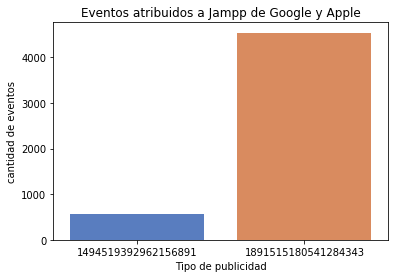

In [9]:
events_atributed_ref_type = events.loc[events['attributed'] == True, ['ref_type']]

graph_attributed_events = sns.countplot(x = events_atributed_ref_type['ref_type'], data = events_atributed_ref_type,\
                                        palette='muted')

graph_attributed_events.set_title("Eventos atribuidos a Jampp de Google y Apple")
graph_attributed_events.set_ylabel("cantidad de eventos")
graph_attributed_events.set_xlabel("Tipo de publicidad")

Text(0.5, 0, 'Hora')

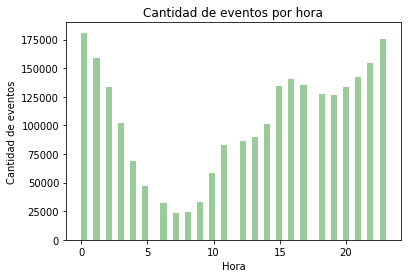

In [10]:
event_for_hour = events.loc[:, ['hour', 'event_id']]
event_for_hour = event_for_hour.dropna()
graph = sns.distplot (event_for_hour['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora",\
                      hist_kws={"color":"g"})

graph.set_title("Cantidad de eventos por hora")
graph.set_ylabel("Cantidad de eventos")
graph.set_xlabel("Hora")



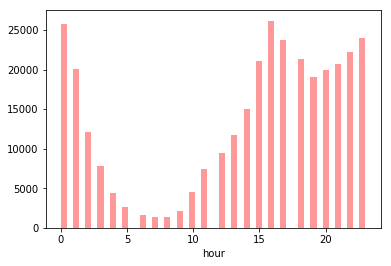

In [127]:
top_apps = [x for x in events['application_id'].value_counts().head(1).keys()]
events_app = events.loc[events['application_id'].isin(top_apps), ['hour', 'application_id']]
events_app.insert(loc = 2, column = 'cant', value=1)
#events_app.groupby(['application_id', 'hour']).agg('count').reset_index()
events_app
graph = sns.distplot (events_app['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora por aplicación",\
                      hist_kws={"color":"r"})

#graph.set_title("Cantidad de eventos por hora por la aplicación mas ocurrente")
#graph.set_ylabel("Cantidad de eventos")
#graph.set_xlabel("Hora")

Text(0.5, 114.0, 'Dia')

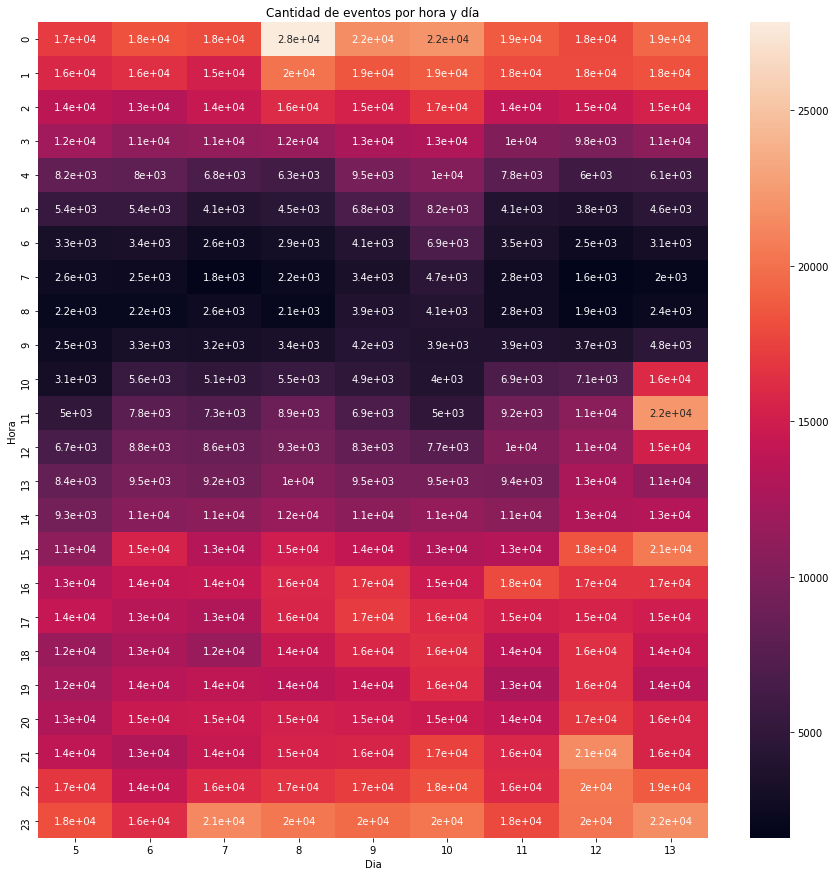

In [120]:
events_week_hour = events.loc[:,['hour', 'day']]
events_week_hour.insert(loc=2, column='cant_events', value=1)
events_week_hour = events_week_hour.pivot_table(index='hour', columns='day', values='cant_events', fill_value=0, aggfunc=np.sum)
plt.figure(figsize=(15,15))
graph = sns.heatmap(events_week_hour, annot=True)
graph.set_title("Cantidad de eventos por hora y día")
graph.set_ylabel("Hora")
graph.set_xlabel("Dia")

Text(0.5, 0, '')

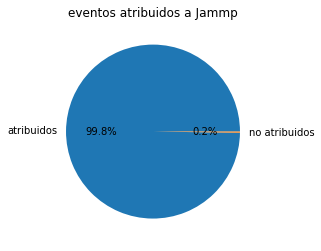

In [21]:
attributed_events = events.loc[: , ['event_id', 'attributed']]
attributed_events = attributed_events.groupby(['attributed']).agg('count').reset_index()

graph = attributed_events['event_id'].plot(kind='pie', autopct='%1.1f%%', labels=['no atribuidos', 'atribuidos'])

graph.set_title("eventos atribuidos a Jammp")
graph.set_ylabel("")
graph.set_xlabel("")

Text(0.5, 0, 'Hora')

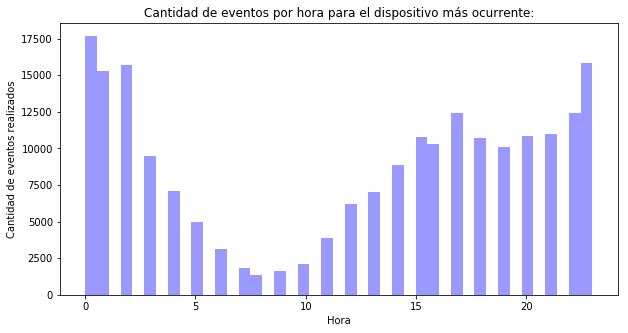

In [145]:
top_device_model = [x for x in events['device_model'].value_counts().head(1).keys()]

events_model = events.loc[events['device_model'].isin(top_device_model), ['hour']]
events_model.insert(loc=0, column='cant_events', value=1)

plt.figure(figsize=(10,5))
graph = sns.distplot (events_model['hour'], kde=False, rug=False, label = " histograma para dispositivo mas ocurrente",\
                      hist_kws={"color":"b"})
graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:")
graph.set_ylabel("Cantidad de eventos realizados")
graph.set_xlabel("Hora")

In [ ]:
events_device = events.loc[:, ['ref_hash', 'hour']]
events_device.insert(loc=2, column='cant_events', value=1)
events_device = events_device.groupby(['ref_hash', 'hour']).agg('sum')
#plt.figure(figsize=(25,15))
#graph = sns.barplot (x=events_device['hour'], y=events_device['cant_events'], data = events_device, hue = events_device['ref_hash'])
#graph = sns.violinplot ()
#graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:")
#graph.set_ylabel("Cantidad de eventos realizados")
#graph.set_xlabel("Hora")

Text(0.5, 0, 'Aplicaciones')

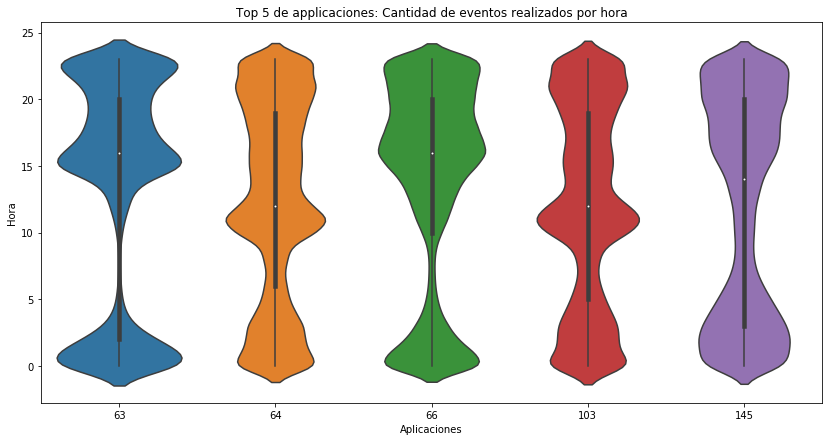

In [11]:
top_apps = [x for x in events['application_id'].value_counts().head(5).keys()]

events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour']]
events_apps.insert(loc = 1, column = 'cant', value = 1)

plt.figure(figsize=(14,7))
graph = sns.violinplot (y=events_apps['hour'], x=events_apps['application_id'], data=events_apps)
graph.set_title("Top 5 de applicaciones: Cantidad de eventos realizados por hora")
graph.set_ylabel("Hora")
graph.set_xlabel("Aplicaciones")

Text(0.5, 0, 'Aplicaciones')

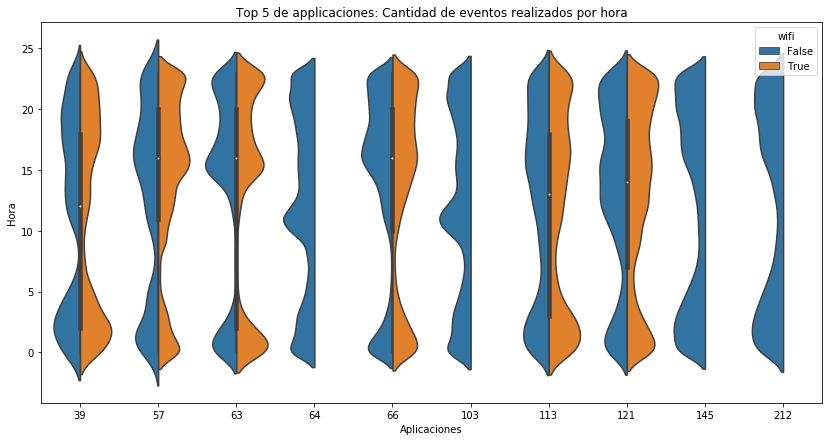

In [100]:
top_apps = [x for x in events['application_id'].value_counts().head(10).keys()]

events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour', 'wifi']]
events_apps.insert(loc = 1, column = 'cant', value = 1)

plt.figure(figsize=(14,7))
graph = sns.violinplot (y='hour', x='application_id', hue='wifi', data=events_apps, split=True)
graph.set_title("Top 5 de applicaciones: Cantidad de eventos realizados por hora")
graph.set_ylabel("Hora")
graph.set_xlabel("Aplicaciones")

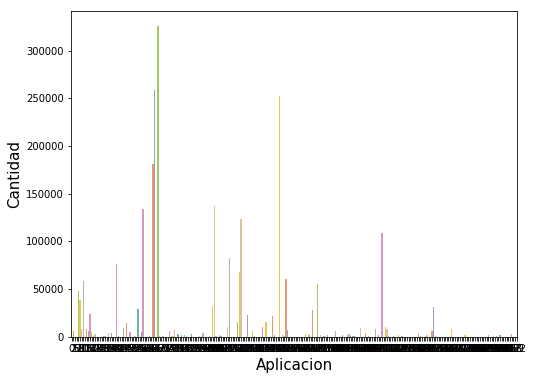

In [22]:
plt.figure(figsize=(8, 6))
g = sns.countplot(x="application_id", data=events, palette="Set2")
g.set_title("", fontsize =18)
g.set_xlabel("Aplicacion", fontsize = 15)
g.set_ylabel("Cantidad", fontsize = 15)
plt.savefig('')

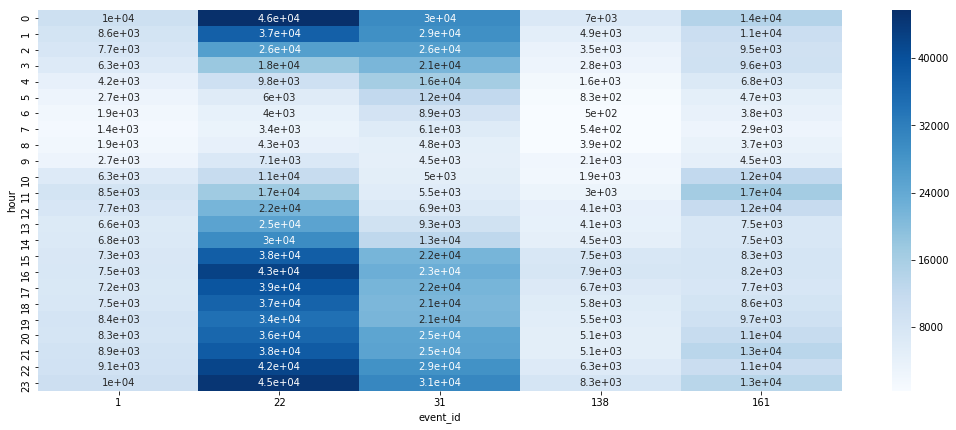

In [43]:
top5_event_id = [x for x in events['event_id'].value_counts().head(5).keys()]
top5_group = events.loc[events['event_id'].isin(top5_event_id)]
event_id_hour = top5_group.groupby(['event_id', 'hour']).size().unstack()
event_id_hour = event_id_hour.fillna(0).T
plt.figure(figsize=(18, 7))
heap_map = sns.heatmap(event_id_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("", fontsize=20)
#heap_map.set_xlabel("", fontsize=15)
#heap_map.set_ylabel("", fontsize=15)
plt.savefig('', bbox_inches = 'tight', pad_inches = 0.1)

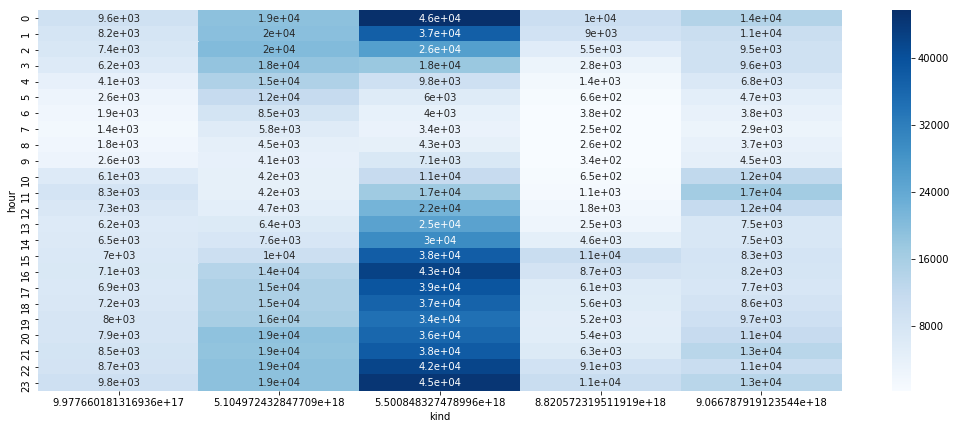

In [42]:
top5_kind = [x for x in events['kind'].value_counts().head(5).keys()]
top5_group = events.loc[events['kind'].isin(top5_kind)]
kind_hour = top5_group.groupby(['kind', 'hour']).size().unstack()
kind_hour = kind_hour.fillna(0).T
plt.figure(figsize=(18, 7))
heap_map = sns.heatmap(kind_hour, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("", fontsize=20)
#heap_map.set_xlabel("", fontsize=15)
#heap_map.set_ylabel("", fontsize=15)
plt.savefig('', bbox_inches = 'tight', pad_inches = 0.1)

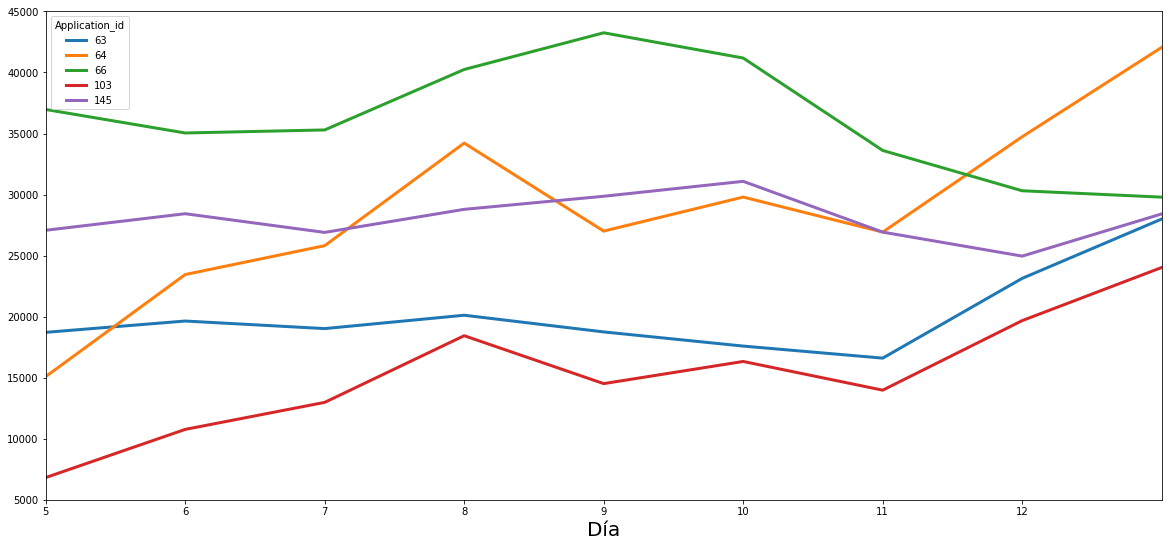

In [26]:
top5_app = [x for x in events['application_id'].value_counts().head(5).keys()]
top5_group = events.loc[events['application_id'].isin(top5_app)]
top_e = top5_group.groupby(['application_id', 'day']).size()
 
fig, ax = plt.subplots()
for key, grp in top_e.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,9), lw=3)
plt.title("",size=25)
ax.set_ylabel('',size=20)
ax.set_xlabel('Día',size=20)
plt.legend(title='Application_id')
plt.xticks(np.arange(8), np.arange(5,13))
plt.savefig('', bbox_inches = 'tight', pad_inches = 0.1)
plt.show()

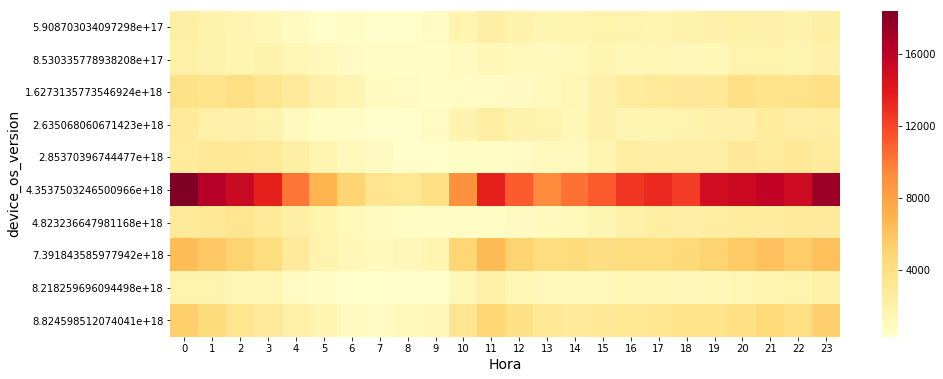

In [30]:
top_device_os_version = [x for x in events['device_os_version'].value_counts().head(10).keys()]
top_group = events.loc[events['device_os_version'].isin(top_device_os_version)]
device_os_version_g = top_group.groupby([ 'device_os_version', 'hour']).size().unstack()
device_os_version_g  = device_os_version_g .fillna(0)
plt.figure(figsize=(15, 6))
heap_map = sns.heatmap(device_os_version_g , cbar=True, cmap="YlOrRd")
heap_map.set_title("", fontsize=18)
heap_map.set_xlabel("Hora", fontsize=14)
heap_map.set_ylabel("device_os_version", fontsize=14)
plt.savefig('', bbox_inches = 'tight', pad_inches = 0.1)

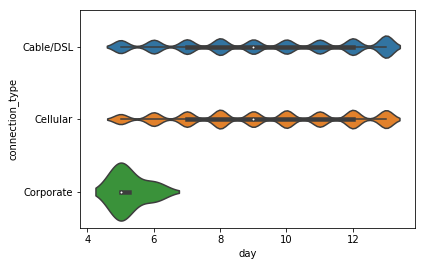

In [21]:
graph = sns.violinplot(x=connection_day['day'], y=connection_day['connection_type'], data=connection_day)

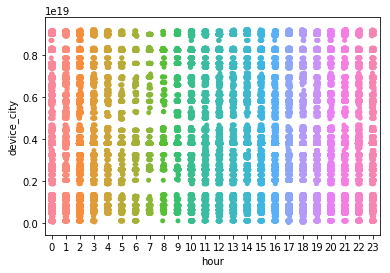

In [28]:
sns.stripplot(x="hour", y="device_city", data=events)

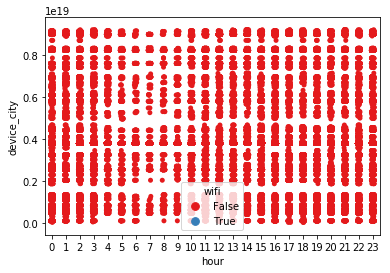

In [29]:
top_device_city = [x for x in events['device_city'].value_counts().head(10).keys()]
top_group = events.loc[events['device_city'].isin(top_device_city)]

sns.stripplot(x="hour",y="device_city",data=events,jitter=True,hue='wifi',palette='Set1')

[36838, 27599, 18874, 15497, 12132, 10103, 8040, 6909, 5701, 4935, 4069, 3599, 3099, 2688, 2409, 2163, 1851, 1739, 1482, 1406, 1265, 1253, 1059, 959, 936, 818, 795, 746, 669, 654, 623, 607, 481, 480, 430, 426, 418, 417, 400, 358, 341, 331, 303, 293, 293, 275, 270, 252, 238, 236, 226, 225, 204, 186, 185, 185, 179, 178, 167, 158, 154, 141, 136, 131, 126, 120, 109, 108, 107, 105, 105, 98, 98, 95, 95, 91, 85, 84, 83, 83, 83, 82, 81, 74, 74, 63, 63, 61, 60, 58, 57, 56, 54, 54, 53, 52, 51, 50, 50, 48, 48, 47, 42, 42, 42, 40, 40, 37, 36, 35, 34, 34, 32, 32, 32, 32, 31, 31, 30, 30, 29, 28, 28, 27, 27, 26, 26, 25, 25, 25, 25, 24, 23, 23, 22, 22, 21, 21, 21, 20, 20, 19, 18, 18, 18, 18, 18, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6

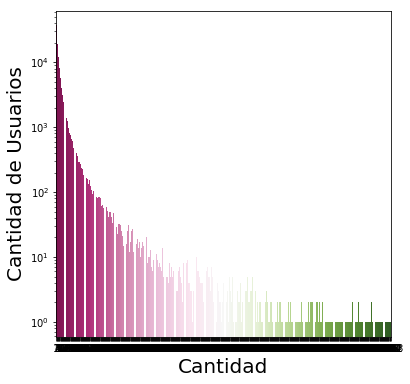

In [28]:
ref_hash_len = events['ref_hash'].value_counts()
print(list(ref_hash_len.value_counts()))

plt.figure(figsize=(6, 6))
 
hash_ref_group = sns.countplot(x=ref_hash_len, palette='PiYG', log=True)
hash_ref_group.set_title("", fontsize =25)
hash_ref_group.set_xlabel('Cantidad', fontsize = 20)
hash_ref_group.set_ylabel("Cantidad de Usuarios", fontsize = 20)
plt.savefig('')

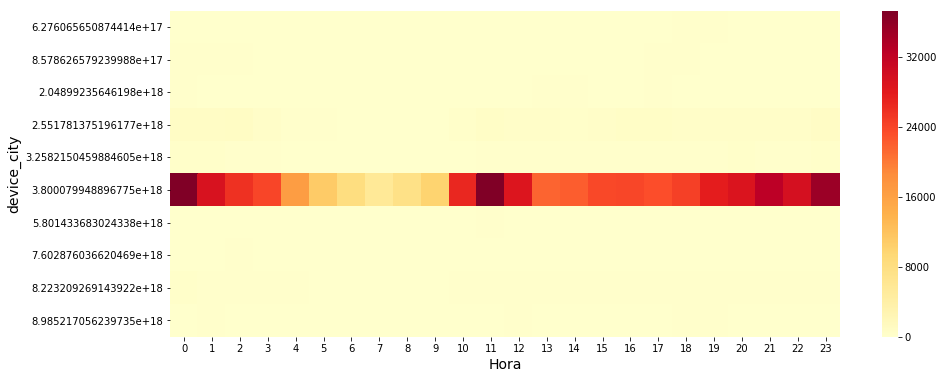

In [33]:
#sns.countplot(x="device_city", data=events, palette="Set2")
top_device_city = [x for x in events['device_city'].value_counts().head(10).keys()]
top_group = events.loc[events['device_city'].isin(top_device_city)]
device_city_g = top_group.groupby([ 'device_city', 'hour']).size().unstack()
device_city_g  = device_city_g .fillna(0)
plt.figure(figsize=(15, 6))
heap_map = sns.heatmap(device_city_g , cbar=True, cmap="YlOrRd")
heap_map.set_title("", fontsize=18)
heap_map.set_xlabel("Hora", fontsize=14)
heap_map.set_ylabel("device_city", fontsize=14)
plt.savefig('', bbox_inches = 'tight', pad_inches = 0.1)

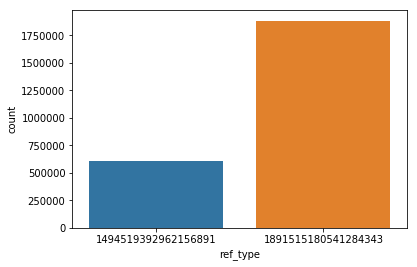

In [85]:
sns.countplot(x="ref_type", data=events)

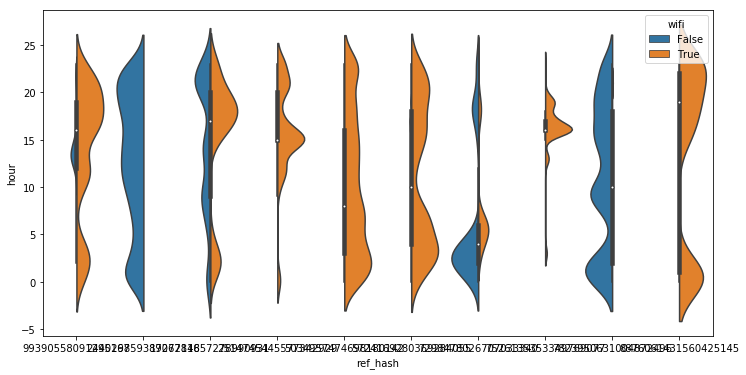

In [97]:
top_usuarios = [x for x in events['ref_hash'].value_counts().head(10).keys()]
top_group = events.loc[events['ref_hash'].isin(top_usuarios), ['ref_hash', 'event_id', 'wifi', 'hour']]
top_group.reset_index(inplace=True)
del top_group['index']

plt.figure(figsize=(12,6))
usuarios_wifi_events_g = sns.violinplot(x='ref_hash', y='hour', hue='wifi', data=top_group, split=True, scale="count", pallete="muted")

In [ ]:
events_os_day = events.loc[:,['device_os', 'day']]

graph = sns.swarmplot( x='day', y='device_os', data=events_os_day, palette=sns.palplot(sns.color_palette("RdBu", n_colors=7)))